In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
pwd

'/Users/andrewozbun/Flatiron/Phase_1/Project_1/dsc-phase-1-project/dsc-phase-1-project'

In [4]:
name_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
name_basics_df.head()


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [6]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [8]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [11]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
#Here I am joining the budget and basics with tconst section because it will allow me to join the budget to the ratings by the tconst column.

In [13]:
budget_tconst = pd.merge(title_basics_df, movie_budgets_df , left_on= 'primary_title', right_on= 'movie', how = 'right')

In [14]:

budget_tconst.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,NaN,NaN,NaN,NaN,NaN,NaN,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
#Searching for NaN values.

In [16]:
budget_tconst.isna().sum()

tconst               3406
primary_title        3406
original_title       3407
start_year           3406
runtime_minutes      3893
genres               3478
id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

In [17]:
#Dropping those values

In [18]:
budget_tconst.dropna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...,...,...,...,...,...,...
7204,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",67,"Apr 28, 2006",Clean,"$10,000","$138,711","$138,711"
7205,tt1872026,Cure,Cure,2011.0,93.0,Drama,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596"
7211,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
7216,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


In [19]:
#Joining this table with the ratings table via the tconst column.

In [20]:
project1_df = pd.merge(budget_tconst,  imdb_ratings_df, on=['tconst'])

In [21]:
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",7.3,665594
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",8.5,670926


In [22]:
#Checking for NaN values.

In [23]:
project1_df.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      118
genres                 8
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
averagerating          0
numvotes               0
dtype: int64

In [24]:
#Again dropping those values

In [25]:
project1_df = project1_df.dropna()

In [26]:
project1_df.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
averagerating        0
numvotes             0
dtype: int64

In [27]:
#Nan values gone, checking for types on columns that should be integers.

In [28]:
project1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   float64
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   id                 2752 non-null   int64  
 7   release_date       2752 non-null   object 
 8   movie              2752 non-null   object 
 9   production_budget  2752 non-null   object 
 10  domestic_gross     2752 non-null   object 
 11  worldwide_gross    2752 non-null   object 
 12  averagerating      2752 non-null   float64
 13  numvotes           2752 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 322.5+ KB


In [29]:
#Conversion to integers:

In [30]:
def column_conversion(df, col):
    df[col] = df[col].str.replace("$","").str.replace(",","").astype('int')
    return df

In [31]:
column_to_convert = ['production_budget','domestic_gross','worldwide_gross']

for col in column_to_convert:
    project1_df = column_conversion(project1_df, col)

In [32]:
#More cleaning...

In [33]:
project1_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,6.0,24451
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,7.3,665594
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt3973612,Stories of Our Lives,Stories of Our Lives,2014.0,60.0,Drama,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,7.5,85
2871,tt1872026,Cure,Cure,2011.0,93.0,Drama,68,"Jul 6, 2001",Cure,10000,94596,94596,4.9,11
2872,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",73,"Jan 13, 2012",Newlyweds,9000,4584,4584,6.4,1436
2873,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,0,0,5.6,43


In [34]:
project1_df.drop_duplicates(subset=['release_date', 'movie','primary_title', 'production_budget'])
project1_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,6.0,24451
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,7.3,665594
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt3973612,Stories of Our Lives,Stories of Our Lives,2014.0,60.0,Drama,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,7.5,85
2871,tt1872026,Cure,Cure,2011.0,93.0,Drama,68,"Jul 6, 2001",Cure,10000,94596,94596,4.9,11
2872,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",73,"Jan 13, 2012",Newlyweds,9000,4584,4584,6.4,1436
2873,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,0,0,5.6,43


In [35]:
#Creating a column of the months to compare gross rates

In [36]:
project1_df['month'] = project1_df['release_date'].str[0:3]
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,month
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43,Dec
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,May
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,6.0,24451,Jun
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,7.3,665594,May
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,8.5,670926,Apr


In [37]:
project1_df['month_inorder'] = pd.DatetimeIndex(pd.to_datetime(project1_df['month'], format='%b')).month
project1_df = project1_df.sort_values('month_inorder', ascending = False)
project1_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,month,month_inorder
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43,Dec,12
1327,tt1877707,The Black Hole,Mind's Eye,2016.0,111.0,"Sci-Fi,Thriller",50,"Dec 21, 1979",The Black Hole,20000000,35841901,35841901,2.8,346,Dec,12
1220,tt2071441,Dangerous Liaisons,Wi-heom-han gyan-gye,2012.0,110.0,"Drama,Mystery,Romance",88,"Dec 21, 1988",Dangerous Liaisons,14000000,34700000,34700000,5.9,1694,Dec,12
1222,tt2671706,Fences,Fences,2016.0,139.0,Drama,37,"Dec 16, 2016",Fences,24000000,57682904,64282881,7.2,86749,Dec,12
1231,tt1833673,Dhoom 3,Dhoom:3,2013.0,172.0,"Action,Thriller",60,"Dec 20, 2013",Dhoom 3,24000000,8031955,11723620,5.4,40466,Dec,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,tt1967545,Labor Day,Labor Day,2013.0,111.0,"Drama,Romance",19,"Jan 31, 2014",Labor Day,18000000,13371528,14189810,6.9,39242,Jan,1
1442,tt1594972,Norm of the North,Norm of the North,2016.0,90.0,"Adventure,Animation,Comedy",9,"Jan 15, 2016",Norm of the North,18000000,17062499,30535660,3.6,7951,Jan,1
1409,tt3341072,Firestorm,Fung bou,2013.0,118.0,"Action,Crime,Thriller",47,"Jan 9, 1998",Firestorm,19000000,8123860,8123860,6.2,2391,Jan,1
1408,tt1436031,Firestorm,Firestorm,2010.0,54.0,Documentary,47,"Jan 9, 1998",Firestorm,19000000,8123860,8123860,7.3,6,Jan,1


In [38]:
project1_df['genres_split'] = project1_df['genres'].map(lambda x: x.split(",") if x else x)
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,month,month_inorder,genres_split
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43,Dec,12,[Horror]
1327,tt1877707,The Black Hole,Mind's Eye,2016.0,111.0,"Sci-Fi,Thriller",50,"Dec 21, 1979",The Black Hole,20000000,35841901,35841901,2.8,346,Dec,12,"[Sci-Fi, Thriller]"
1220,tt2071441,Dangerous Liaisons,Wi-heom-han gyan-gye,2012.0,110.0,"Drama,Mystery,Romance",88,"Dec 21, 1988",Dangerous Liaisons,14000000,34700000,34700000,5.9,1694,Dec,12,"[Drama, Mystery, Romance]"
1222,tt2671706,Fences,Fences,2016.0,139.0,Drama,37,"Dec 16, 2016",Fences,24000000,57682904,64282881,7.2,86749,Dec,12,[Drama]
1231,tt1833673,Dhoom 3,Dhoom:3,2013.0,172.0,"Action,Thriller",60,"Dec 20, 2013",Dhoom 3,24000000,8031955,11723620,5.4,40466,Dec,12,"[Action, Thriller]"


In [39]:
all_genres = set()
for genres in project1_df['genres_split']:
    if genres:
        all_genres.update(genres)

In [40]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [41]:
project1_df['1_genre'] = project1_df['genres_split'].map(lambda x: x[0])
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,month,month_inorder,genres_split,1_genre
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43,Dec,12,[Horror],Horror
1327,tt1877707,The Black Hole,Mind's Eye,2016.0,111.0,"Sci-Fi,Thriller",50,"Dec 21, 1979",The Black Hole,20000000,35841901,35841901,2.8,346,Dec,12,"[Sci-Fi, Thriller]",Sci-Fi
1220,tt2071441,Dangerous Liaisons,Wi-heom-han gyan-gye,2012.0,110.0,"Drama,Mystery,Romance",88,"Dec 21, 1988",Dangerous Liaisons,14000000,34700000,34700000,5.9,1694,Dec,12,"[Drama, Mystery, Romance]",Drama
1222,tt2671706,Fences,Fences,2016.0,139.0,Drama,37,"Dec 16, 2016",Fences,24000000,57682904,64282881,7.2,86749,Dec,12,[Drama],Drama
1231,tt1833673,Dhoom 3,Dhoom:3,2013.0,172.0,"Action,Thriller",60,"Dec 20, 2013",Dhoom 3,24000000,8031955,11723620,5.4,40466,Dec,12,"[Action, Thriller]",Action


In [42]:
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,month,month_inorder,genres_split,1_genre
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.1,43,Dec,12,[Horror],Horror
1327,tt1877707,The Black Hole,Mind's Eye,2016.0,111.0,"Sci-Fi,Thriller",50,"Dec 21, 1979",The Black Hole,20000000,35841901,35841901,2.8,346,Dec,12,"[Sci-Fi, Thriller]",Sci-Fi
1220,tt2071441,Dangerous Liaisons,Wi-heom-han gyan-gye,2012.0,110.0,"Drama,Mystery,Romance",88,"Dec 21, 1988",Dangerous Liaisons,14000000,34700000,34700000,5.9,1694,Dec,12,"[Drama, Mystery, Romance]",Drama
1222,tt2671706,Fences,Fences,2016.0,139.0,Drama,37,"Dec 16, 2016",Fences,24000000,57682904,64282881,7.2,86749,Dec,12,[Drama],Drama
1231,tt1833673,Dhoom 3,Dhoom:3,2013.0,172.0,"Action,Thriller",60,"Dec 20, 2013",Dhoom 3,24000000,8031955,11723620,5.4,40466,Dec,12,"[Action, Thriller]",Action


In [43]:
#Remove outliers

In [44]:
from scipy.stats import zscore
project1_df['z_score'] = abs(zscore(project1_df['worldwide_gross']))
project1_df = project1_df[(project1_df['z_score'] <= 3)]

In [45]:
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,month,month_inorder,genres_split,1_genre,z_score
1327,tt1877707,The Black Hole,Mind's Eye,2016.0,111.0,"Sci-Fi,Thriller",50,"Dec 21, 1979",The Black Hole,20000000,35841901,35841901,2.8,346,Dec,12,"[Sci-Fi, Thriller]",Sci-Fi,0.336995
1220,tt2071441,Dangerous Liaisons,Wi-heom-han gyan-gye,2012.0,110.0,"Drama,Mystery,Romance",88,"Dec 21, 1988",Dangerous Liaisons,14000000,34700000,34700000,5.9,1694,Dec,12,"[Drama, Mystery, Romance]",Drama,0.342609
1222,tt2671706,Fences,Fences,2016.0,139.0,Drama,37,"Dec 16, 2016",Fences,24000000,57682904,64282881,7.2,86749,Dec,12,[Drama],Drama,0.197162
1231,tt1833673,Dhoom 3,Dhoom:3,2013.0,172.0,"Action,Thriller",60,"Dec 20, 2013",Dhoom 3,24000000,8031955,11723620,5.4,40466,Dec,12,"[Action, Thriller]",Action,0.455575
1268,tt1206543,Out of the Furnace,Out of the Furnace,2013.0,116.0,"Crime,Drama,Thriller",41,"Dec 4, 2013",Out of the Furnace,22000000,11330849,15434375,6.8,99037,Dec,12,"[Crime, Drama, Thriller]",Crime,0.437331


In [46]:
#Question 1: Does a higher budget result in a higher rating?

In [47]:
#I first just looked at Rating v Worldwide Gross, and truly did not see much of a relationship.

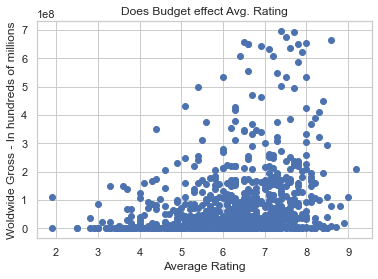

In [48]:
plt.scatter(x='averagerating', y='worldwide_gross', data=project1_df.iloc[0:1000])
plt.xlabel('Average Rating')
plt.ylabel('Woldwide Gross - In hundreds of millions')
plt.title('Does Budget effect Avg. Rating')
plt.show()

In [49]:
#So I broke it down by High, Mid, and Low grossing films and still did not see any relationship.

<ipython-input-50-db559261c069>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


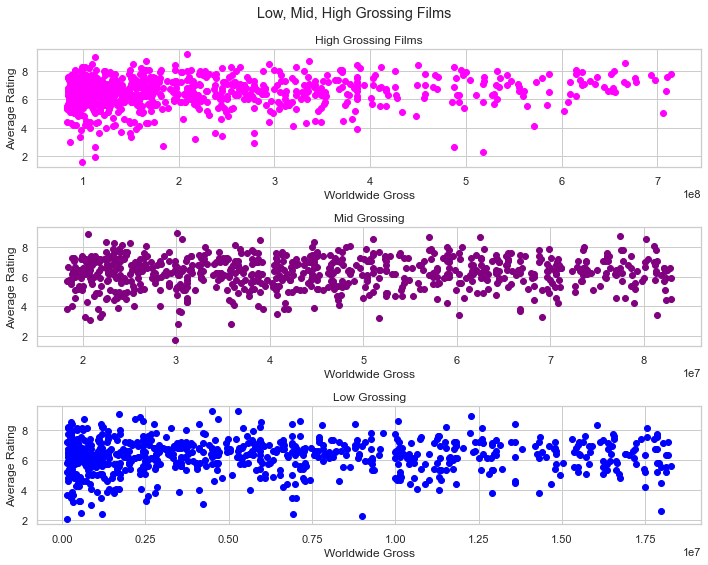

In [50]:
df1 = project1_df.sort_values('worldwide_gross', ascending = False)

fig, axs = plt.subplots(3, figsize = (10,8))
fig.suptitle("Low, Mid, High Grossing Films")


axs[0].scatter(x='worldwide_gross', y='averagerating', data=df1.iloc[0:750], color='magenta')
axs[1].scatter(x='worldwide_gross', y='averagerating', data=df1.iloc[751:1500], color='purple')
axs[2].scatter(x='worldwide_gross', y='averagerating', data=df1.iloc[1501:2250],color='blue')

axs[0].set_xlabel('Worldwide Gross')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('High Grossing Films')

axs[1].set_xlabel('Worldwide Gross')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Mid Grossing')

axs[2].set_xlabel('Worldwide Gross')
axs[2].set_ylabel('Average Rating')
axs[2].set_title('Low Grossing')

fig.tight_layout()
fig.show()

In [51]:
#I added in the third value of Budget and finally found a relationship between worldwide gross and budget.  The budget does not have to be too large, but should still be in the range of 100-200 million.

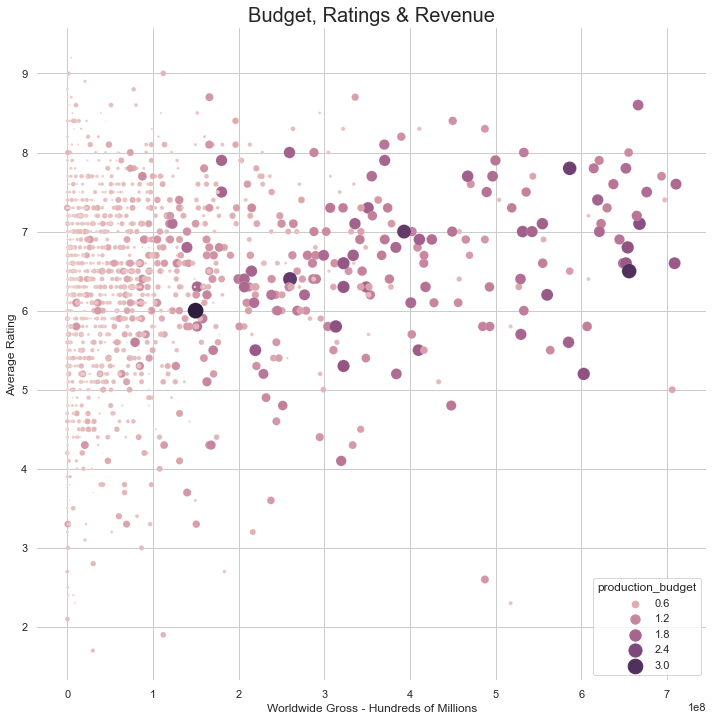

In [52]:
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="worldwide_gross", y="averagerating",
                hue="production_budget",
                size='production_budget',
                sizes=(1,250),
                data=project1_df.iloc[200:2000], ax=ax)

ax.set_title('Budget, Ratings & Revenue', fontsize=20)
ax.set_ylabel('Average Rating')
ax.set_xlabel('Worldwide Gross - Hundreds of Millions')
plt.savefig('png_1')
plt.show()

In [53]:
#Question 2: Does the time of year effect the gross revenue?  
#i.e. Are people staying indoors and going to the movies in the winter,
#Is it more slow in the summer because people are outside?

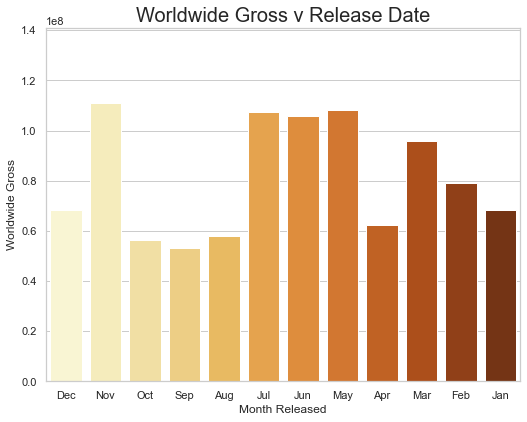

In [54]:
f, ax = plt.subplots(figsize=(8.5, 6.5))
sns.barplot(x="month", y="worldwide_gross", data=project1_df, 
            palette = "YlOrBr")


ax.set_title('Worldwide Gross v Release Date', fontsize=20)
ax.set_ylabel('Worldwide Gross')
ax.set_xlabel('Month Released')
ax.lines = []
plt.savefig('png_2')
plt.show()

In [55]:
#I think there is a clear relationship between holiday months and movie box office success.

In [56]:
#Question 3: Does worldwide gross make that much of a contribution to overall gross?

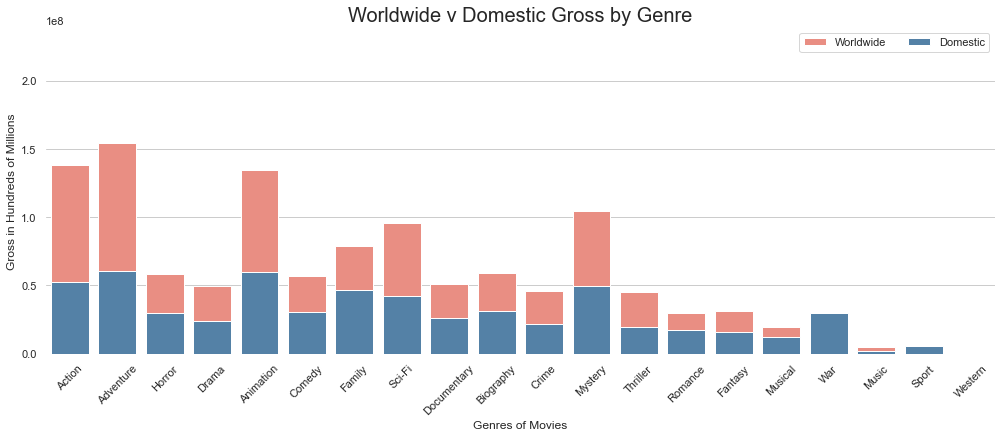

In [57]:
df = project1_df.sort_values('worldwide_gross', ascending = False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(17, 6))
# Plot the total gross and label domestic so when the boxes are layered it shows the remaining domestic gross.
sns.set_color_codes("pastel")
sns.barplot(x="1_genre", y="worldwide_gross", data=df,
            label="Worldwide", color="salmon")

# Plot worldwide gross over total
sns.set_color_codes("muted")
sns.barplot(x="1_genre", y="domestic_gross", data=df,
            label="Domestic", color="steelblue")

# Adding legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set( ylabel="Gross in Hundreds of Millions",
       xlabel="Genres of Movies")
sns.despine(left=True, bottom=True)
ax.set_title('Worldwide v Domestic Gross by Genre', fontsize=20)
ax.lines = []

plt.savefig('png_3')
plt.xticks(rotation=45)
plt.show()